# Probability Plotting

Probability plotting is a method of estimating, the old fashioned way (paper and pencil) the parameters of an assumed distribution.

The Surpyval module uses the least squares onto the probability plot (except for the Gamma distribution) for the 'MPP' method.

Although on most occassions it is sensible to use the Maximum Likelihood Estimate, it is prudent to check that your fitted model resembles your data. The plot function of the parametric distribution does exctly that. It plots the transformed non parametric CDF with the line of best fit for that model over the top. This allows you to do a quick sense check on the fit. Demonstrated in this notebook is some of the results you can achieve with the Surpyval module.

In [50]:
import surpyval as surv
import numpy as np
import matplotlib.pyplot as plt

In [60]:
x = surv.Beta.random(10, 5., 10.)
surv.Beta.fit(x, how='MLE').params

(3.3920853121219245, 7.905467167459987)

In [61]:
x = surv.LogNormal.random(10, 5., 0.4)
surv.Gamma.fit(x, how='MLE').params

(4.988553266893814, 0.03122134545853905)

In [11]:
x = np.array([32, 33, 34, 35, 36, 37, 38, 39, 40, 42]) * 1.275
n = np.array([10, 33, 81, 161, 224, 289, 336, 369, 383, 389])
n = np.concatenate([[n[0]], np.diff(n)])
# n = None
c = None
# n = None
# Mr Weibull's measurements are cumulative, so let's calculate the obervations at each point.
dist = surv.Weibull3p
# model = dist.fit(x, c=c, n=n, how='MLE', fixed={'sigma' : 3.})
model = dist.fit(x, c=c, n=n, how='MLE')
print(model)
# model.plot()

Parametric Surpyval model with Weibull3p distribution fitted by MLE yielding parameters (7.141925172743747, 2.6204523865552556, 39.76562966895884)


/opt/anaconda3/lib/python3.7/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/autograd/tracer.py:48: RuntimeWarning: invalid value encountered in log
  return f_raw(*args, **kwargs)


(7.141925172743747, 2.6204523865552556, 39.76562966895884)

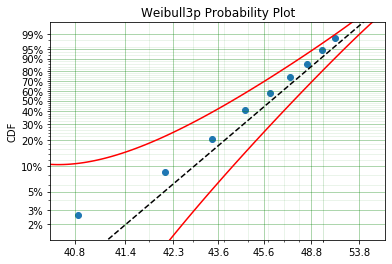

In [12]:
model_fixed = dist.fit(x, c=c, n=n, how='MLE')
model_fixed.plot()
model_fixed.params

Parametric Surpyval model with Weibull distribution fitted by MLE yielding parameters (47.36735846095558, 17.571319500380767)


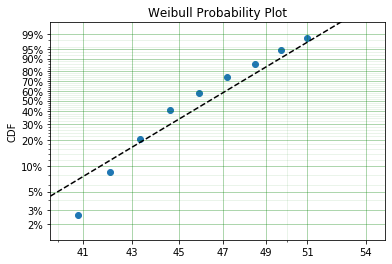

In [13]:
x = np.array([32, 33, 34, 35, 36, 37, 38, 39, 40, 42]) * 1.275
n = np.array([10, 33, 81, 161, 224, 289, 336, 369, 383, 389])
n = np.concatenate([[n[0]], np.diff(n)])
# n = None
c = None
# Mr Weibull's measurements are cumulative, so let's calculate the obervations at each point.

# weib_3p = surv.Weibull.fit(x, c=c, n=n, how='MLE', fixed={'beta' : 18.})
weib_3p = surv.Weibull.fit(x, c=c, n=n, how='MLE')
weib_3p.plot(plot_bounds=False);
print(weib_3p)

In [14]:
weib_3p.params

(47.36735846095558, 17.571319500380767)

In [15]:
x = [2, 2, 2, 5, 6, [4, 6], [3, 4], [1, np.inf]]
c = [0, 1, -1, -1, 1, 2,      2,       2]
n = [10, 1, 1, 1, 1, 2, 1, 1]

Parametric Surpyval model with Weibull distribution fitted by MPP yielding parameters (2.8233743765107002, 1.9182058962315884)


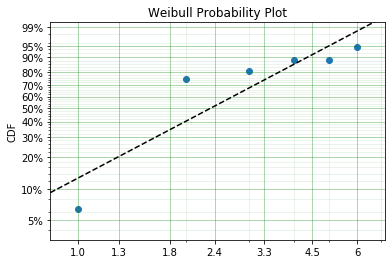

In [16]:
model = surv.Weibull.fit(x, c, n, 'MPP')
np_model = surv.Turnbull.fit(x, c, n)
model.plot('Turnbull')
print(model)

In [17]:
x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 3, 4, 4, 5, 6, 7, 8]
c = None
n = None

Parametric Surpyval model with Weibull distribution fitted by MLE yielding parameters (5.774600409714656, 2.479094128181022)


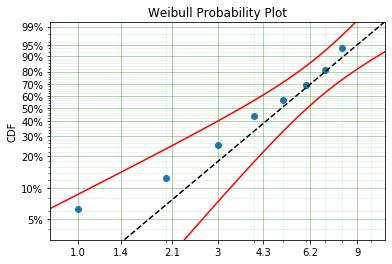

In [18]:
model = surv.Weibull.fit(x, c, n)
np_model = surv.Turnbull.fit(x, c, n)
model.plot()
print(model)

/Users/DerrynKnife1/Projects/surpyval/surpyval/nonparametric/nonparametric.py:74: RuntimeWarning: divide by zero encountered in log
  R_out = self.greenwood * 1./(np.log(self.R)**2)
/Users/DerrynKnife1/Projects/surpyval/surpyval/nonparametric/nonparametric.py:74: RuntimeWarning: invalid value encountered in true_divide
  R_out = self.greenwood * 1./(np.log(self.R)**2)
/Users/DerrynKnife1/Projects/surpyval/surpyval/nonparametric/nonparametric.py:75: RuntimeWarning: divide by zero encountered in log
  R_out = np.log(-np.log(self.R)) - stat * np.sqrt(R_out)


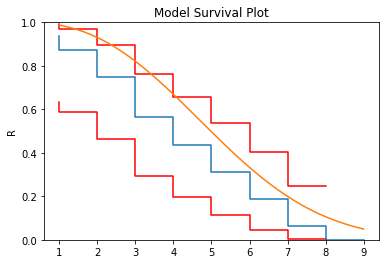

In [19]:
np_model.plot()
xx = np.linspace(1, 9)
plt.plot(xx, model.sf(xx))

In [20]:
x = surv.Gamma.random(100, 5, 0.4)

Parametric Surpyval model with ExpoWeibull distribution fitted by MLE yielding parameters (12.223080420792744, 2.2489453840000815, 1.5131285113055406)


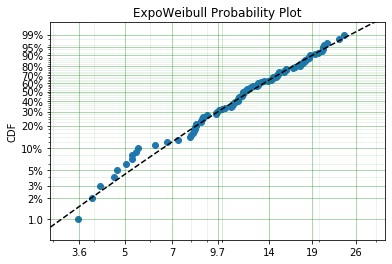

In [21]:
model = surv.ExpoWeibull.fit(x, how='MLE', rr='x')
model.plot()
print(model)

In [22]:
x = [1, 2, 3, 4, 5, 5, 6, 7, 9, 10, 14, 15, 16, 16, 17, 18]
model = surv.Weibull3p.fit(x)
model.plot('Nelson-Aalen', plot_bounds=False);
print(model.params)
mm = surv.MixtureModel(x=x, dist=surv.Weibull, m=2)
mm.fit(how='MLE')
##mm.plot('Nelson-Aalen', plot_bounds=False)

xx = np.linspace(1, 20)
plt.plot(xx, 1 - mm.R_cb(xx, cb=0.05), color='red');

ValueError: array must not contain infs or NaNs

(2.9728136473497964, 1.653031687742974)

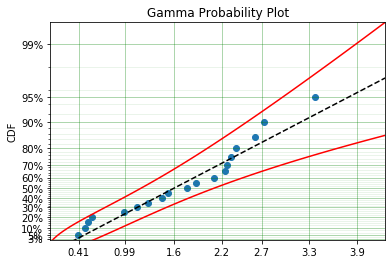

In [23]:
dist = surv.Gamma
x = [2, 3, 4, 5, 5, 6, 7, 8, 10, 14, 15, 16, 16, 17, 17, 18]
x = surv.Gamma.random(20, 4, 2)
model = dist.fit(x, how='MLE')
model.plot(heuristic='Turnbull', plot_bounds=True);
model.params

Using a ball bearing failure time data set from Lieblein and Zelen (1956). Can be found [here](https://nvlpubs.nist.gov/nistpubs/jres/057/5/V57.N05.A04.pdf)

(81.87455872386947, 2.1018468637694045)

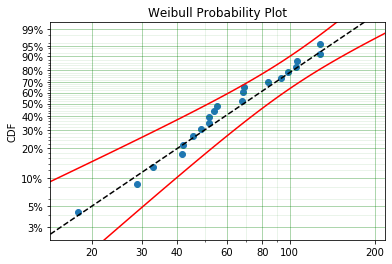

In [24]:
x = [17.88, 28.92, 33, 41.52, 42.12, 45.6, 48.4, 51.84, 
     51.96, 54.12, 55.56, 67.8, 68.64, 68.64, 68.88, 84.12, 
     93.12, 98.64, 105.12, 105.84, 127.92, 128.04, 173.4]
model = surv.Weibull.fit(x)
model.plot()
plt.savefig('weibull_plot.png')
model.params

Using data from the man the distribution is named after! Weibull uses data on the tensile strength of bofors steel. Data can be accessed [here](https://pdfs.semanticscholar.org/88c3/7770028e7ed61180a34d6a837a9a4db3b264.pdf)

(74.66588100640693, 1.86563461191969, 5.20675649497333)

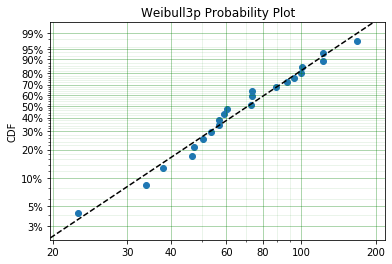

In [25]:
weib_3p = surv.Weibull3p.fit(x, n=None, how='MPP', rr='y', heuristic='Nelson-Aalen')
weib_3p.plot(heuristic='Nelson-Aalen', plot_bounds=False);
weib_3p.params

(90.53205325077793, 1.9833237250965545, 18.504068812494555)


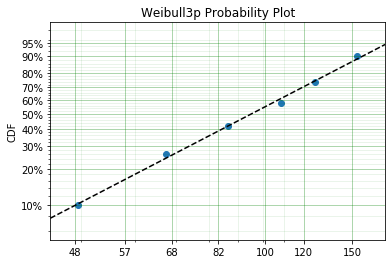

In [26]:
x = np.array([48, 66, 85, 107, 125, 152])
weib_3p = surv.Weibull3p.fit(x, how='MPP', heuristic='Blom')
print(weib_3p.params)
weib_3p.plot(heuristic='Blom', plot_bounds=False);

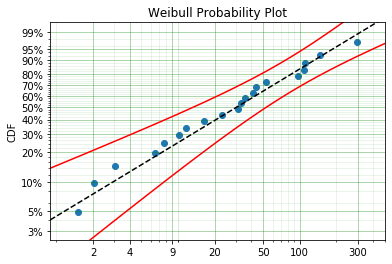

In [27]:
x = surv.Weibull.random(20, 50, 0.8)

model = surv.parametric.Weibull.fit(x, how='MLE')
model.plot(heuristic='Nelson-Aalen');

We might also have a scenario where the reliability could be best modelled as a mixture of two Weibull distributions.

In [28]:
x = surv.Gumbel.random(20, 50, 0.6)

model = surv.parametric.Gumbel.fit(x, how='MLE')
# model.plot(heuristic='Fleming-Harrington');

In [29]:
model.params

(49.83511427124035, 0.7490740803465494)

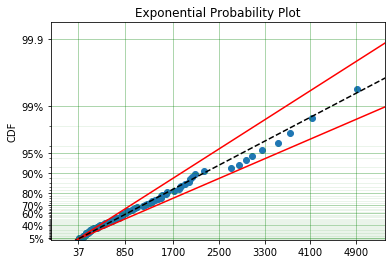

In [30]:
dist = surv.Exponential
x = dist.random(100, 1e-3)

model = dist.fit(x, how='MLE')
model.plot(heuristic='Nelson-Aalen');

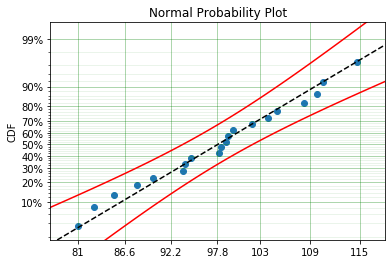

In [31]:
dist = surv.Normal
x = dist.random(20, 100, 10)

model = dist.fit(x, how='MLE')
model.plot(heuristic='Filliben');

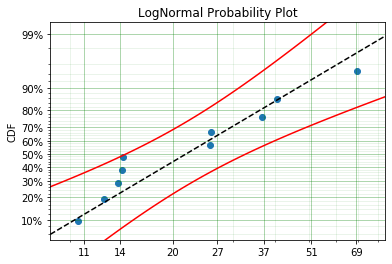

In [32]:
dist = surv.LogNormal
x = dist.random(10, 3, 0.8)

model = dist.fit(x, how='MLE')
model.plot(heuristic='Nelson-Aalen', cb=0.05);

In [35]:
dist = surv.Uniform
x = dist.random(100, 1, 20)

model = dist.fit(x, how='MLE')
model.plot(heuristic='Fleming-Harrington', plot_bounds=False);
model.params

LinAlgError: Singular matrix

(5.4696172045048, 18.82438310071401)

/Users/DerrynKnife1/Projects/surpyval/surpyval/parametric/logistic.py:64: RuntimeWarning: divide by zero encountered in true_divide
  return -np.log(1./y - 1)


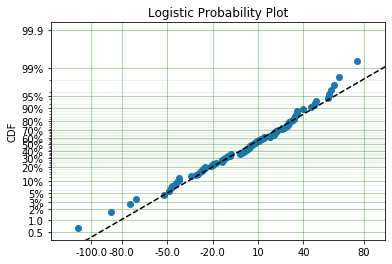

In [36]:
dist = surv.parametric.Logistic
x = dist.random(100, 1, 20)

model = dist.fit(x, how='MLE')
model.plot(heuristic='Blom', plot_bounds=False);
model.params

/Users/DerrynKnife1/Projects/surpyval/surpyval/parametric/loglogistic.py:40: RuntimeWarning: invalid value encountered in power
  return 1. / (1 + (x/alpha)**-beta)


(2.1601532114997153, 0.9537359905387044)

/Users/DerrynKnife1/Projects/surpyval/surpyval/parametric/loglogistic.py:68: RuntimeWarning: divide by zero encountered in true_divide
  return -np.log(1./y - 1)


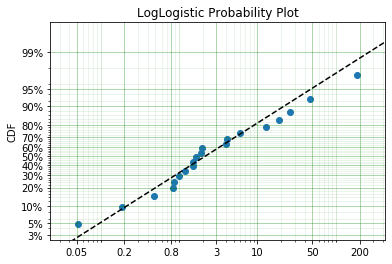

In [37]:
dist = surv.parametric.LogLogistic
x = dist.random(20, 3, 0.9)

model = dist.fit(x, how='MSE')
model.plot(heuristic='Nelson-Aalen', plot_bounds=False);
model.params

In [38]:
import surpyval as surv
from surpyval import Weibull3p, Weibull
import numpy as np

In [46]:
x = Weibull3p.random(30, 5, 4, 50)
cens = 54
c = np.zeros_like(x)
c[x > cens] = 1
x[x > cens] = cens
n = None
x, c, n = surv.xcn_handler(x, c, n)

In [49]:
model = Weibull3p.fit(x, c, n, how='MLE')
model.params

ValueError: array must not contain infs or NaNs

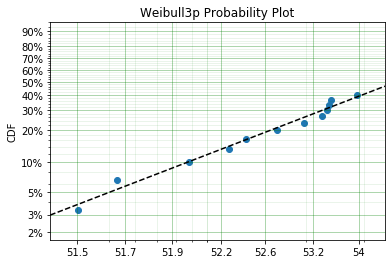

In [48]:
model.plot()
